<a href="https://colab.research.google.com/github/anjunjin/PFE-ING3-IA/blob/branch1/Repr%C3%A9sentation_du_texte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie "commune"

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/PFE/"
data = pd.read_csv(DATA_PATH+"Tweets_parsed.csv", encoding='utf-8').drop(['Unnamed: 0'], axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data.sample(random_state=42, n=5, replace=False)

,liability,liability_label,tweet,description,user_screen_name,parsed
1023,1,site plutôt douteux,découpe morceaux disqueuse ami venait dhériter...,Un site sensationnaliste belge qui peut s'avér...,LBDTSS,découpe morceaux disqueuse ami venait dhériter...
8637,1,site plutôt douteux,santé payer mutuelle grâce regroupement httpst...,Un site qui se présente comme un « portail lib...,ndffr,santé payer mutuelle grâce regroupement httpst...
6887,1,site plutôt douteux,chine 30 pib forme crédit amazon 120 fois prof...,Un site Internet qui publie des analyses tranc...,leseconoclastes,chine 30 pib forme crédit amazon 120 fois prof...
10861,0,site plutôt fiable,desident_emot_right_arrow️ paulcng l’émergence...,Un site d'information généraliste qui se prése...,streetpress,desident_emot_right_arrow️ paulcng l’émergence...
5381,1,site plutôt douteux,rt pierrehermefr 11 gâteaux chocolats forme cœ...,"Comme indiqué dans les mentions légales, il s'...",lesucretvous,rt pierrehermefr 11 gâteaux chocolats forme cœ...


In [3]:
data

,liability,liability_label,tweet,description,user_screen_name,parsed
0,1,site plutôt douteux,l’entretien complet httpstco0edjwyvqsm,France-Soir était un journal fondé par Pierre ...,france_soir,l’entretien complet httpstco0edjwyvqsm
1,1,site plutôt douteux,desident_emot_ballot_box_with_ballot️premier t...,France-Soir était un journal fondé par Pierre ...,france_soir,desident_emot_ballot_box_with_ballot️premier t...
2,1,site plutôt douteux,catherineavice tribune desident_emot_backhand_...,France-Soir était un journal fondé par Pierre ...,france_soir,catherineavice tribune desident_emot_backhand_...
3,1,site plutôt douteux,desident_emot_Canada fois histoire uber eats s...,France-Soir était un journal fondé par Pierre ...,france_soir,desident_emot_Canada fois histoire uber eats s...
4,1,site plutôt douteux,desident_emot_musical_score grands artistes se...,France-Soir était un journal fondé par Pierre ...,france_soir,desident_emot_musical_score grands artistes se...
...,...,...,...,...,...,...
16890,0,site plutôt fiable,another reason to drink more water desident_em...,Un site qui donne des conseils et astuces sur ...,wikiHow,another reason to drink more water desident_em...
16891,0,site plutôt fiable,wikitips httpstcoxdce9gsn3w httpstcoy2dnfsoowe,Un site qui donne des conseils et astuces sur ...,wikiHow,wikitips httpstcoxdce9gsn3w httpstcoy2dnfsoowe
16892,0,site plutôt fiable,wikitips httpstcoqvfv3yjxgg httpstcoslsyp2sime,Un site qui donne des conseils et astuces sur ...,wikiHow,wikitips httpstcoqvfv3yjxgg httpstcoslsyp2sime
16893,0,site plutôt fiable,wikitips httpstcoyuzfjn9xkq httpstcouvybonhwoi,Un site qui donne des conseils et astuces sur ...,wikiHow,wikitips httpstcoyuzfjn9xkq httpstcouvybonhwoi


In [4]:
data['parsed'].tolist()

['l’entretien complet httpstco0edjwyvqsm',
 'desident_emot_ballot_box_with_ballot️premier tour pri desident_date relr eciotti arrive tête 2559 affrontera second tour vpecresse 25… httpstcojcpxg2cgzi',
 'catherineavice tribune desident_emot_backhand_index_pointing_down httpstco5pzg8pno9j',
 'desident_emot_Canada fois histoire uber eats s’associe magasin canadien tokyo smoke possible… httpstcojrqhl2zeql',
 'desident_emot_musical_score grands artistes seuls profité quelquun émerge siècles… httpstcoycd6dzbmdf',
 'rt jfpoisson78 desident_emot_balance_scale️ 2ème contreattaque viaofficiel jai saisi conseil detat quil considère illégal décret n° desident_date 15…',
 'desident_emot_no_littering l’association sauvage méditerranée organise année consécutive chasse trésor france a… httpstcobhbrpwgput',
 'desident_emot_train ans lancement coopérative ferroviaire railcoop rouler train fret occi… httpstcoxokbrv5gpf',
 'rt nicolasvdrines1 pr lascola «dose3 bonne idée risq m’embête c’est pr risq jeune

# Séparation en 3

Divisier le model en 3 partie : train(60%), test(20%), valid(20%)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# X : le tweet
X = data['parsed']
# y : site fiable / pas fiable
y = data['liability_label']

In [7]:
# 100% dataset : 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
# 80% dataset(train) : 80%*0.75=60% train  80%*0.25=20% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [9]:
print("X_train.shape : ",X_train.shape,", X_val.shape : ",X_val.shape, ", X_test.shape : ",X_test.shape)

X_train.shape :  (10137,) , X_val.shape :  (3379,) , X_test.shape :  (3379,)


Visualiser le distribution de model

In [10]:
import matplotlib.pyplot as plt
import numpy as np

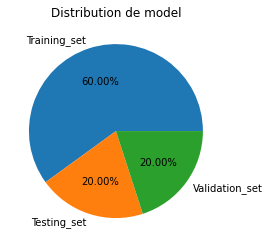

In [11]:
model_size = np.array([X_train.count(), X_test.count(), X_val.count()])

plt.pie(model_size,
        # labels de pie chart
        labels=['Training_set','Testing_set','Validation_set'], 
        # pourcentage
        autopct='%.2f%%', 
       )
plt.title("Distribution de model")
plt.show()

# Bag of words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# créer un objet de CountVectorizer
countvectorizer = CountVectorizer()
# countvectorizer = CountVectorizer(min_df=50, max_df=0.95)

In [14]:
# fonction Bag_of_words 
# Entrée : list de tweet
# Sortie : vecteurs de tweet
def bag_of_words(text):
  bag = countvectorizer.fit_transform(text)
  return bag

In [15]:
# un exemple de test
"""exemple = X_train[0]
exemple1 = X_train[10]
exemple2 = X_train[20]

print('exemple : ', exemple)
print('exemple1 : ', exemple1)
print('exemple2 : ', exemple2)


bag = bag_of_words([exemple, exemple1,exemple2])
bag.toarray()
feature_names = countvectorizer.get_feature_names()
pd.DataFrame(bag.toarray(), columns=feature_names)
"""

"exemple = X_train[0]\nexemple1 = X_train[10]\nexemple2 = X_train[20]\n\nprint('exemple : ', exemple)\nprint('exemple1 : ', exemple1)\nprint('exemple2 : ', exemple2)\n\n\nbag = bag_of_words([exemple, exemple1,exemple2])\nbag.toarray()\nfeature_names = countvectorizer.get_feature_names()\npd.DataFrame(bag.toarray(), columns=feature_names)\n"

In [16]:
tweet = np.array(X_train)

In [20]:
len(X_train)

10137

In [17]:
bag = countvectorizer.fit_transform(tweet)
bag.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
feature_names = countvectorizer.get_feature_names()
pd.DataFrame(bag.toarray(), columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,000006,008wkg,01,0109,019,025,0307,037,05,06,068,07,08,080519,0807,0day,10,100,1000,100000,1000e,100m2,100s,100ème,101,103ème,1080p,1088,1095,10bn,10h30,10h35,11,110,111,1112,1124,113,1130,...,العلامة,المغربية,المنتخب,الوطني,بازيان,بريد,تحذر,تطلق,تكميم,جديد,جريمة,حاتم,حاسبات,حريق,حظر,حماية,رفع,سوني,سينا,ضد,عبر,عيب,فلسطين,في,قتل,قد,لتدريب,للوحيات,ملاك,من,مناصرو,نهاية,والنضال,يؤدي,يعود,桃氣一零,𝒱𝓊,𝖈𝖔𝖑𝖊,𝖕𝖔𝖚𝖗,𝖙𝖔𝖚𝖘
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
len(tweet)

10137

In [17]:
text = []
for tweet in X_train:
  text.append(tweet)
print(text)

bag = bag_of_words(text)
bag.toarray()

['jura vivent pass sanitaire sen portent desident_emot_backhand_index_pointing_right httpstcob1bk7sygnu passsanitaire vaccinationcovid covid19', 'rt mdemeaux toul desident_emot_right_arrow️ bar fermé desident_date nonrespect pass sanitaire httpstcodv7mtvz10g', 'rt morandiniblog twitter victime desident_date cyberattaque histoire gros comptes certifiés piratés ce…', 'l’oms prévoitelle 236 000 décès covid19 europe d’ici 1er desident_date httpstcoqoeepoa6xs', 'presse océan desident_emot_newspaper desident_date 31 desident_date journal lire version numérique ici desident_emot_backhand_index_pointing_right… httpstcoh2qxh9nzlo', 'desident_emot_movie_camera desident_date politique covid19 passeportsanitaire couru davance maître fabrice di vizio … httpstcoz7ylgi5s7k', 'desident_emot_red_circle coronavirus desident_emot_France france bilan 0807 desident_date 5 728 837 cas covid19 4 442 nouveaux cas 110 344 décès 25… httpstcovjzswmlfya', 'édulcorants nocifs flore intestinale httpstco8sjq1h2o4h h

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# TF-IDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['parsed'].tolist())

In [50]:
featured_names = vectorizer.get_feature_names()
print(f'Feature names \n{featured_names}')
# matrix = X.todense()
# denseliste = matrix.tolist()
# df = pd.DataFrame(denseliste, columns=featured_names)
# print(f'Final result of TF-IDF \n{df}')

Feature names 
['00', '000', '000006', '008wkg', '01', '0109', '019', '02', '025', '0307', '037', '0405', '05', '06', '068', '07', '08', '080519', '0807', '085', '09', '0day', '10', '100', '1000', '100000', '1000e', '100620', '100m2', '100s', '100ème', '101', '102', '103ème', '105', '107', '108', '1080p', '1088', '1095', '10bn', '10e', '10h', '10h30', '10h35', '10h40', '10millionsdepauvres', '10x', '10ème', '11', '110', '11000', '110m', '111', '1111', '1112', '112', '1124', '113', '1130', '1135', '114', '1142', '114m', '115', '116', '11a', '11day', '11e', '11h', '11h15', '11h30', '11h45', '11è', '12', '120', '1200', '12000', '120000', '1200000000000', '1200kg', '120k', '12132019', '1214', '1214h', '1217', '1218', '123', '124', '125', '1250000', '125j', '126', '12764', '127e', '128', '129', '1295', '129774', '12e', '12h', '12h30', '12hjour', '12le', '12tn', '13', '130', '1300', '131', '132', '1335', '135', '136', '137', '138', '13e', '13h', '13h30', '13hsopo', '13k', '14', '140', '1400'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
print(vectorizer.get_feature_names_out())
print('\n')
print(X.shape)

['00' '000' '000006' ... '𝖈𝖔𝖑𝖊' '𝖕𝖔𝖚𝖗' '𝖙𝖔𝖚𝖘']


(16895, 55536)


In [52]:
test = 0
for item in featured_names:
  if ((item[0] == '0') or (item[0] == '1') or (item[0] == '2') or (item[0] == '3') or (item[0] == '4') or (item[0] == '5') or (item[0] == '6') or (item[0] == '7') or (item[0] == '8') or (item[0] == '9')):
    test = test + 1
print(test)

771


#A faire

Nettoyage de tous les tweets maintenant (lancer la nuit)

pour les tweets d'entrainement : faire un sample sur tous les tweets, pas grave si répartition aléatoire